In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the image
img_gray = load_img('bw_image.jpeg')

In [13]:
# Define the model architecture
def build_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(256, 256, 1)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))  # Output should have 3 channels for RGB
    model.add(UpSampling2D((2, 2)))
    return model


In [15]:
# Convert the image to grayscale
img_gray = img_gray.convert('L')

In [16]:
# Resize the image to the desired size
img_gray = img_gray.resize((256,256))

In [17]:
# Convert the image to a numpy array
img_gray = img_to_array(img_gray)

In [18]:
# Normalize the image
img_gray = img_gray / 255.0

In [19]:
# Add a new dimension to the array to make it compatible with the input shape of the model
img_gray = np.expand_dims(img_gray, axis=0)

In [21]:
model.summary()

NameError: name 'model' is not defined

In [11]:
model.compile(optimizer='adam', loss='mse')

NameError: name 'model' is not defined

In [31]:
# Build the model
model = build_model()

In [32]:
# Load the pre-trained weights
model.load_weights('trained-model.h5', by_name=True)

In [33]:
# Colorize the grayscale image
img_colorized = model.predict(img_gray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


In [34]:
# Save the colorized image
img_colorized = img_colorized * 128 + 128
img_colorized = np.clip(img_colorized, 0, 255).astype('uint8')
img_colorized = array_to_img(img_colorized[0])
img_colorized.save('colorized_image.jpg')

(-0.5, 255.5, 255.5, -0.5)

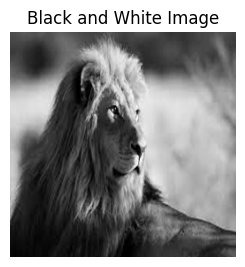

In [39]:
# Display the black and white image
plt.subplot(1, 2, 1)
plt.imshow(array_to_img(img_gray[0]), cmap='gray')
plt.title('Black and White Image')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

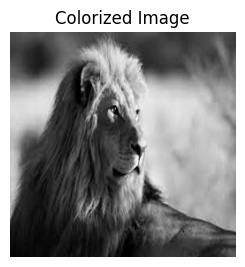

In [41]:
# Display the colorized image
plt.subplot(1, 2, 2)
plt.imshow(img_colorized)
plt.title('Colorized Image')
plt.axis('off')

In [42]:
print("Performed by: Hrishikesh Bari || Roll No: 68")

Performed by: Hrishikesh Bari || Roll No: 68
